# Red Sequence Redshift Calculator

In [1]:
from helpers import *
from redshift_predictor import *

First we're going to initialize the `Predictor` object. It takes a .txt file that defines the redshift model, of the following format:
> Redshift,   r_mag,   g-r_col, g-r_slope,  z_mag,   r-z_col, r-z_slope

The `compute_arrays()` function is just some required pre-processing of the model.

In [2]:
pred = Predictor('RSmodel_Oct2021.txt')
pred.compute_arrays()

The predictor has a built-in method to visualize the model. It plots a color-magnitude diagram, where the third (colormap) axis represents redshift. In other words, each line represents one bin of redshift in the model.

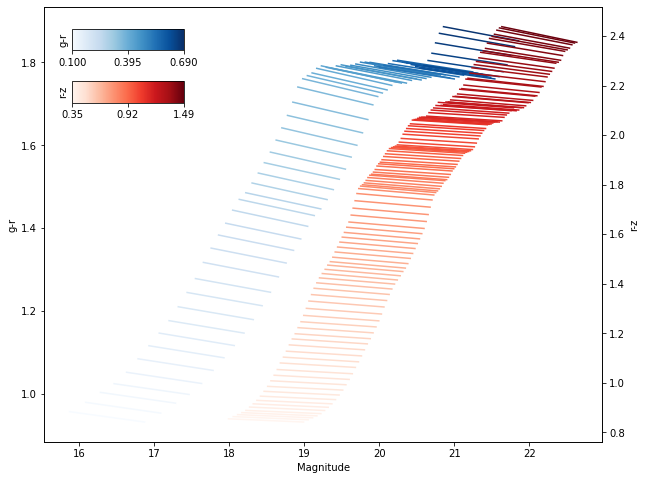

In [3]:
pred.plot_lines()

We can use the `predict_from_values(r, z, gr, rz)` function to get the predicted redshift for a given datapoint. The function returns one tuple for each color band, of format `(redshift, index)`. The index refers to the index of the model — that is, which row of the redshift model txt file is being used here. 

This function also has a verbose flag which is set to True by default.

In [4]:
pred.predict_from_values(18, 19, 1.2, 1.3, verbose=True)

g-r: z = 0.19
r-z: z = 0.58


((0.19, 9), (0.58, 23))

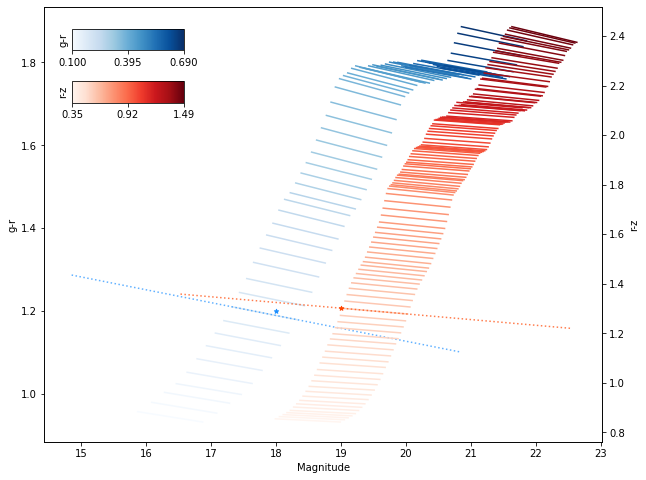

In [5]:
#The argument in this function sets the width of the dashed lines, so you can adjust for better visual clarity.
pred.plot_prediction(3)

If you only have one band, you can set the irrelevant parameters to None. Side note: don't try to plot this point. I still need to adjust the plotting function to handle None values... :p

In [6]:
pred.predict_from_values(18, None, 1.2, None)

g-r: z = 0.19
r-z: z = None


((0.19, 9), (None, None))

You can also predict arrays of data. The algorithm will vectorize the predictions and return a numpy array of redshifts for each color. It will handle any bad data (NaN, None, or infinite values) by returning a None value where applicable. 

Unfortunately, you can't plot any of these predictions using the plotting function. 

This option is much faster than looping through the data. 

In [7]:
mags = np.linspace(16,23,100)
cols = np.linspace(1,2,100)

In [8]:
gr, rz = pred.predict_from_values(mags, mags, cols, cols)
print(gr)

[0.12 0.12 0.12 0.13 0.13 0.14 0.14 0.14 0.15 0.15 0.15 0.16 0.16 0.16
 0.17 0.17 0.17 0.18 0.18 0.19 0.19 0.19 0.19 0.2  0.2  0.2  0.21 0.21
 0.21 0.22 0.22 0.22 0.23 0.23 0.23 0.24 0.24 0.25 0.25 0.25 0.26 0.26
 0.27 0.27 0.28 0.28 0.29 0.29 0.3  0.3  0.31 0.31 0.32 0.32 0.32 0.33
 0.33 0.34 0.34 0.34 0.35 0.35 0.36 0.36 0.36 0.37 0.37 0.38 0.38 0.4
 0.41 0.42 0.44 0.46 0.49 0.52 0.62 0.65 0.65 0.66 0.67 0.67 0.68 0.68
 0.69 0.69 0.69 0.69 0.69 0.69 0.69 0.69 0.69 0.69 0.69 0.69 0.69 0.69
 0.69 0.69]


### There are a few more miscellaneous functions available here which you probably won't need. But I'll cover them briefly:

`predict_from_values` is kind of an alias for `import_test_data` + `predict`. But while `predict_from_values` only takes magnitudes as arguments, `import_test_data` will convert fluxes to magnitudes automatically, as you can see below. This function doesn't handle arrays of data, though, so it's probably smarter to pre-process your flux data yourself and just feed it into `predict_from_values` (see below).

In [9]:
pred.import_test_data(.2, .3, .25, mags=False)
pred.predict()
print(pred.g_data) # <-- note that this is *not* the same as g_flux, which we set to be 0.2

g-r: z = 0.1
r-z: z = 0.35
24.247425010840047


You can pre-process data, as mentioned above, using `flux_to_mag()`:

In [10]:
mags = np.linspace(.01,1,100)
print(flux_to_mag(mags))

[27.5        26.74742501 26.30719686 25.99485002 25.75257499 25.55462187
 25.3872549  25.24227503 25.11439373 25.         24.89651829 24.80204688
 24.71514162 24.63467991 24.55977185 24.48970004 24.4238777  24.36181874
 24.303116   24.24742501 24.19445176 24.1439433  24.09568041 24.0494719
 24.00514998 23.96256663 23.92159059 23.88210492 23.84400501 23.80719686
 23.77159577 23.73712505 23.70371515 23.67130271 23.63982989 23.60924375
 23.57949569 23.55054101 23.52233848 23.49485002 23.46804036 23.44187677
 23.41632886 23.39136831 23.36696872 23.34310542 23.31975536 23.29689691
 23.2745098  23.25257499 23.23107456 23.20999164 23.18931033 23.1690156
 23.14909328 23.12952993 23.11031286 23.09143002 23.07286997 23.05462187
 23.03667541 23.01902078 23.00164863 22.98455007 22.96771661 22.95114016
 22.93481299 22.91872772 22.90287727 22.8872549  22.87185413 22.85666876
 22.84169285 22.8269207  22.81234684 22.79796602 22.78377319 22.76976349
 22.75593227 22.74227503 22.72878745 22.71546537 22.7